# Table of Contents
 <p><div class="lev1"><a href="#Chicago-crime"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chicago crime</a></div>

Chicago crime
=============

In [2]:
mvt <- read.csv("mvt.csv", stringsAsFactors=FALSE)

In [3]:
str(mvt)

'data.frame':	191641 obs. of  3 variables:
 $ Date     : chr  "12/31/12 23:15" "12/31/12 22:00" "12/31/12 22:00" "12/31/12 22:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [4]:
mvt$Date <- strptime(mvt$Date, format="%m/%d/%y %H:%M")

In [5]:
str(mvt)

'data.frame':	191641 obs. of  3 variables:
 $ Date     : POSIXlt, format: "2012-12-31 23:15:00" "2012-12-31 22:00:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


In [10]:
mvt$Weekday <- weekdays(mvt$Date)
mvt$Hour <- mvt$Date$hour

In [11]:
str(mvt)

'data.frame':	191641 obs. of  5 variables:
 $ Date     : POSIXlt, format: "2012-12-31 23:15:00" "2012-12-31 22:00:00" ...
 $ Latitude : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude: num  -87.6 -87.7 -87.8 -87.7 -87.6 ...
 $ Weekday  : chr  "lundi" "lundi" "lundi" "lundi" ...
 $ Hour     : int  23 22 22 22 21 20 20 20 19 18 ...


In [12]:
table(mvt$Weekday)


dimanche    jeudi    lundi    mardi mercredi   samedi vendredi 
   26316    27319    27397    26791    27416    27118    29284 

In [13]:
WeekdayCounts <- as.data.frame(table(mvt$Weekday))

In [14]:
str(WeekdayCounts)

'data.frame':	7 obs. of  2 variables:
 $ Var1: Factor w/ 7 levels "dimanche","jeudi",..: 1 2 3 4 5 6 7
 $ Freq: int  26316 27319 27397 26791 27416 27118 29284


In [15]:
library(ggplot2)

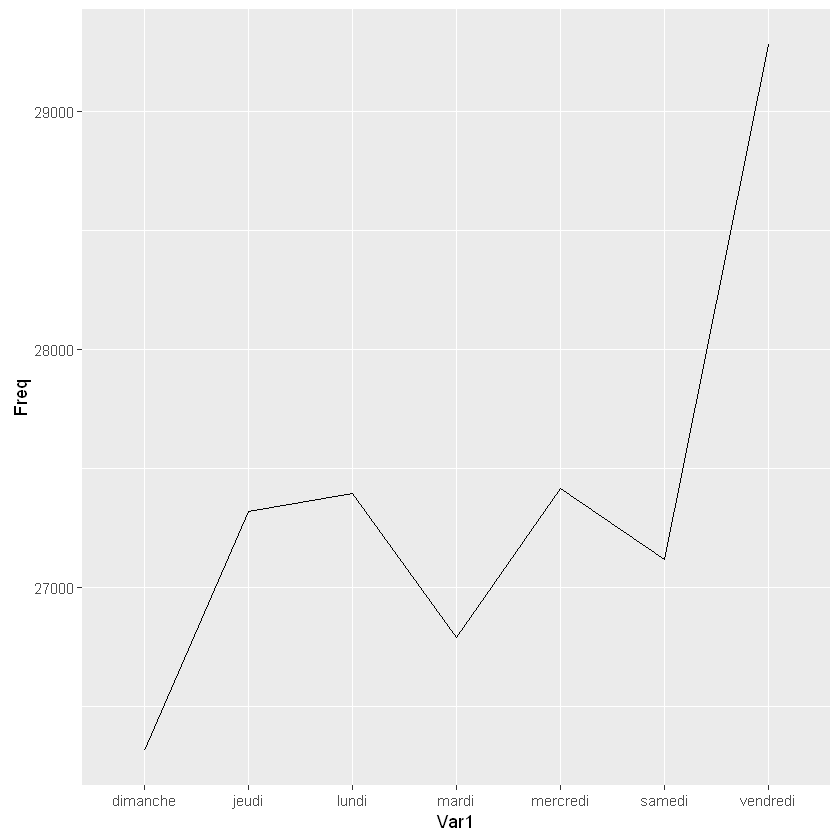

In [16]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1))

In [17]:
WeekdayCounts$Var1 <- factor(
    WeekdayCounts$Var1, ordered=TRUE, 
    levels=c(
        "dimanche", "lundi", "mardi", "mercredi", 
        "jeudi", "vendredi", "samedi"
    )
)

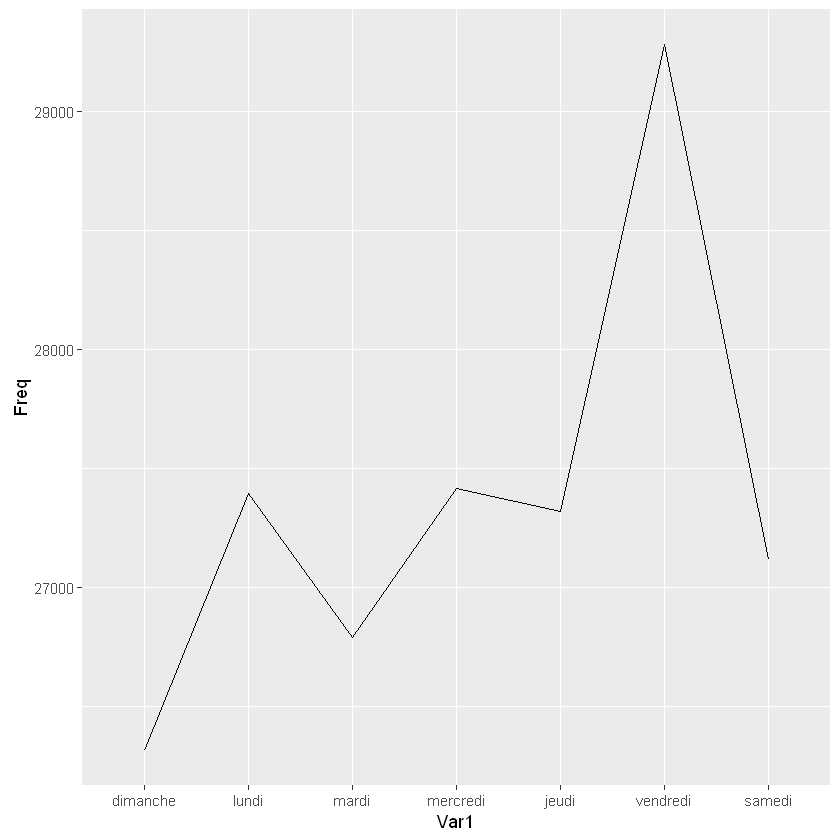

In [18]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) + geom_line(aes(group=1))

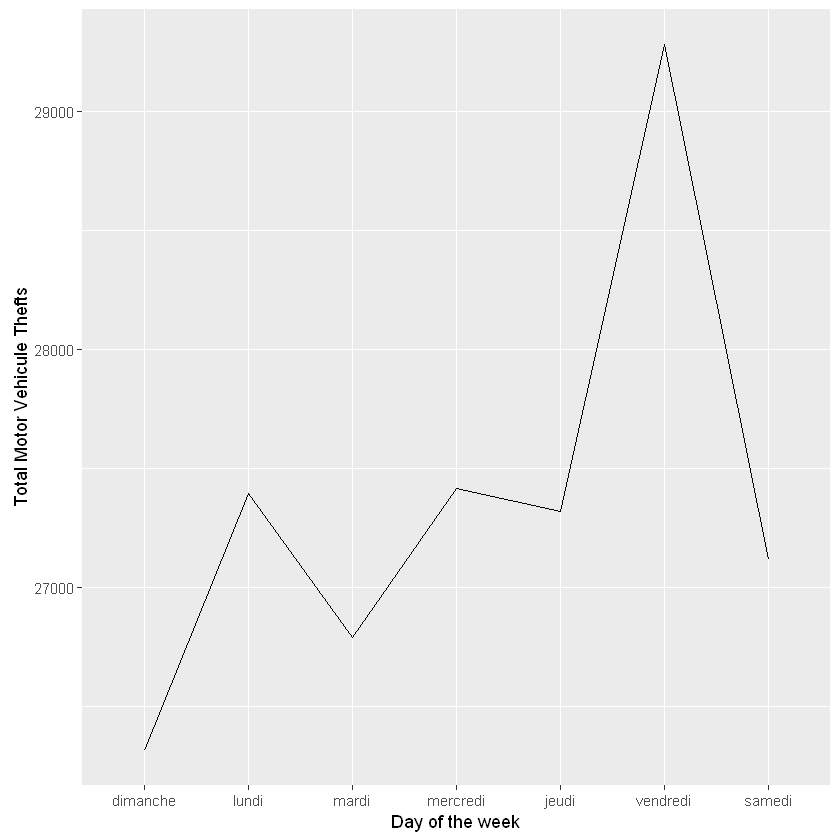

In [21]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
geom_line(aes(group=1)) +
xlab("Day of the week") + ylab("Total Motor Vehicule Thefts")

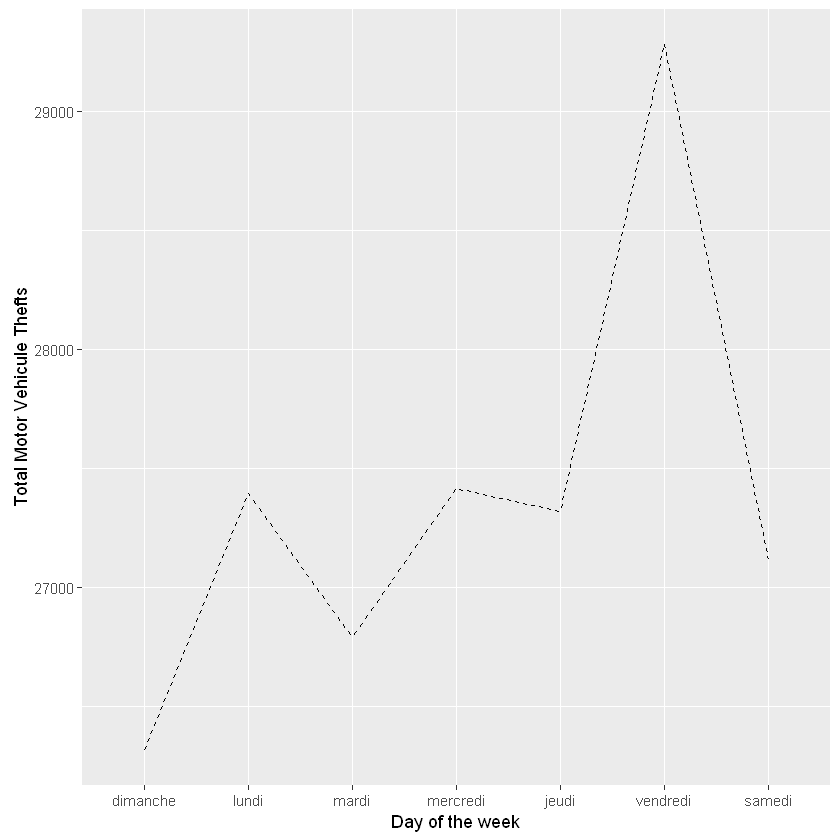

In [22]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
geom_line(aes(group=1), linetype=2) +
xlab("Day of the week") + ylab("Total Motor Vehicule Thefts")

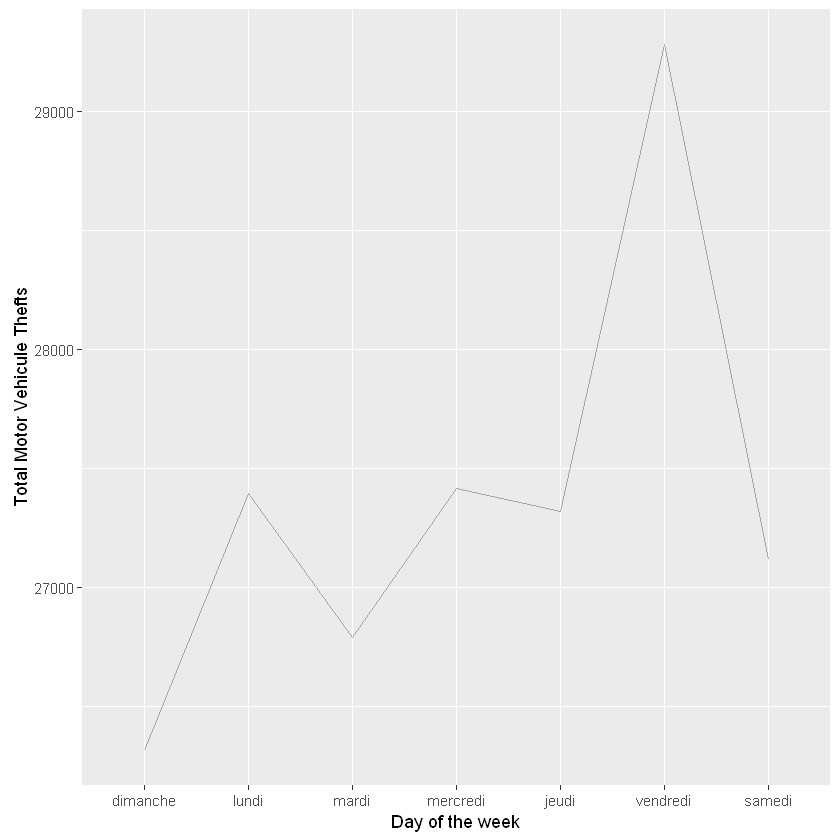

In [23]:
ggplot(WeekdayCounts, aes(x=Var1, y=Freq)) +
geom_line(aes(group=1), alpha=.3) +
xlab("Day of the week") + ylab("Total Motor Vehicule Thefts")

In [24]:
table(mvt$Weekday, mvt$Hour)

          
              0    1    2    3    4    5    6    7    8    9   10   11   12
  dimanche 2028 1236 1019  838  607  461  478  483  615  864  884  787 1192
  jeudi    1856  816  696  508  400  534  799 1135 1298 1301  932  731 1093
  lundi    1900  825  712  527  415  542  772 1123 1323 1235  971  737 1129
  mardi    1691  777  603  464  414  520  845 1118 1175 1174  948  786 1108
  mercredi 1814  790  619  469  396  561  862 1140 1329 1237  947  763 1225
  samedi   2050 1267  985  836  652  508  541  650  858 1039  946  789 1204
  vendredi 1873  932  743  560  473  602  839 1203 1268 1286  938  822 1207
          
             13   14   15   16   17   18   19   20   21   22   23
  dimanche  789  959 1037 1083 1160 1389 1342 1706 1696 2079 1584
  jeudi     752  831 1044 1131 1258 1510 1537 1668 1776 2134 1579
  lundi     824  958 1059 1136 1252 1518 1503 1622 1815 2009 1490
  mardi     762  908 1071 1090 1274 1553 1496 1696 1816 2044 1458
  mercredi  804  863 1075 1076 1289 1580

In [25]:
DayHourCounts <- as.data.frame(table(mvt$Weekday, mvt$Hour))

In [26]:
str(DayHourCounts)

'data.frame':	168 obs. of  3 variables:
 $ Var1: Factor w/ 7 levels "dimanche","jeudi",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  2028 1856 1900 1691 1814 2050 1873 1236 816 825 ...


In [27]:
DayHourCounts$Hour <- as.numeric(as.character(DayHourCounts$Var2))

In [28]:
str(DayHourCounts)

'data.frame':	168 obs. of  4 variables:
 $ Var1: Factor w/ 7 levels "dimanche","jeudi",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ Var2: Factor w/ 24 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ Freq: int  2028 1856 1900 1691 1814 2050 1873 1236 816 825 ...
 $ Hour: num  0 0 0 0 0 0 0 1 1 1 ...


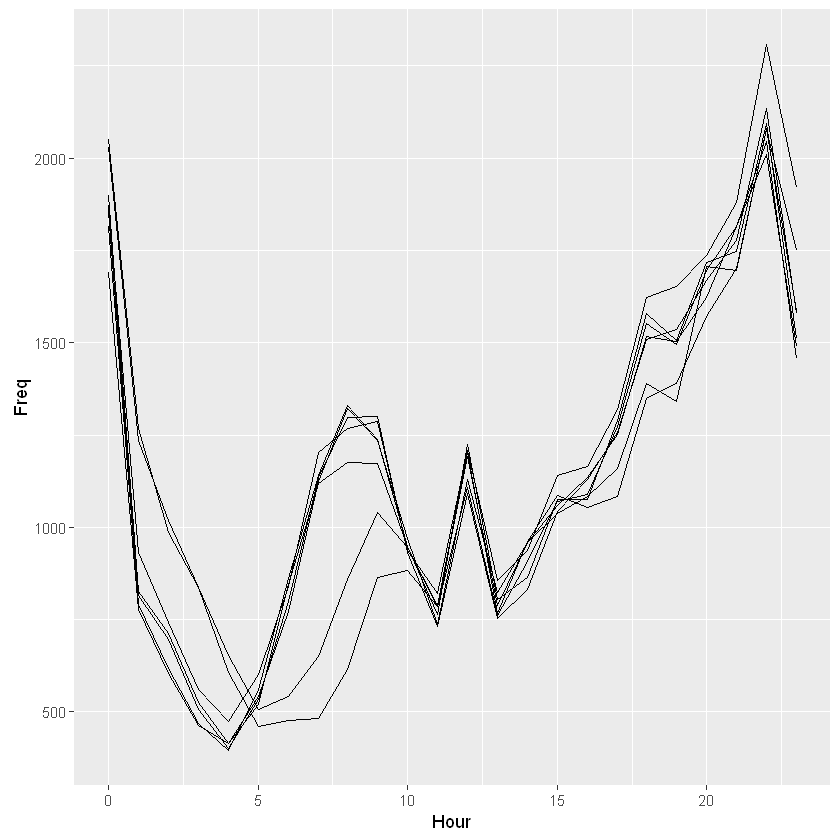

In [29]:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) + geom_line(aes(group=Var1))

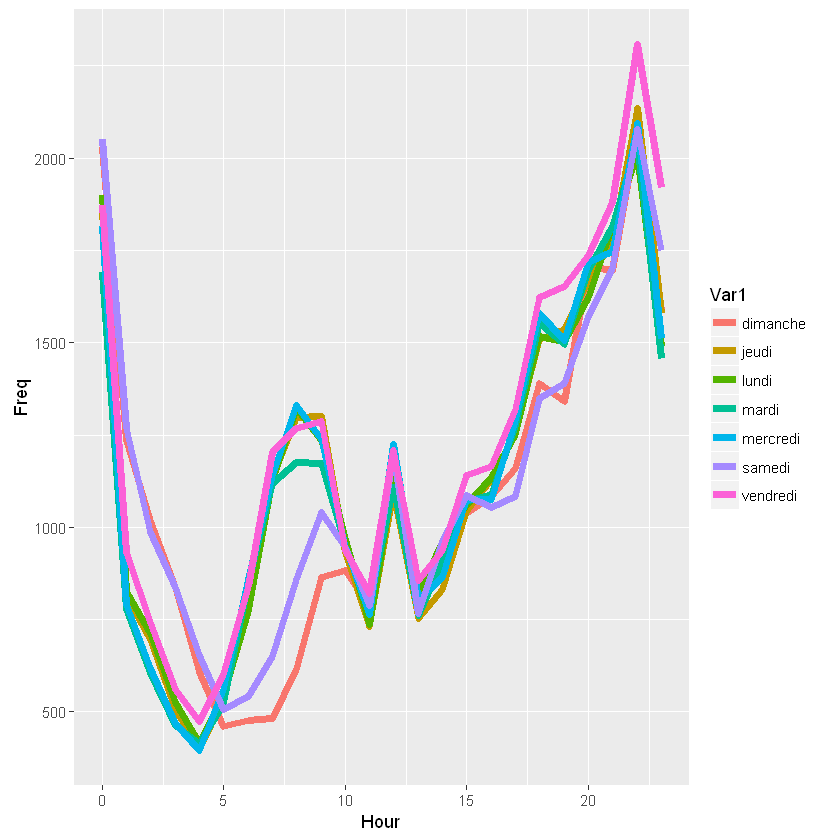

In [33]:
ggplot(DayHourCounts, aes(x=Hour, y=Freq)) +
geom_line(aes(group=Var1, color=Var1), size=2)

In [34]:
DayHourCounts$Var1 <- factor(
    DayHourCounts$Var1,
    ordered=TRUE,
    levels=c("lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche")
)

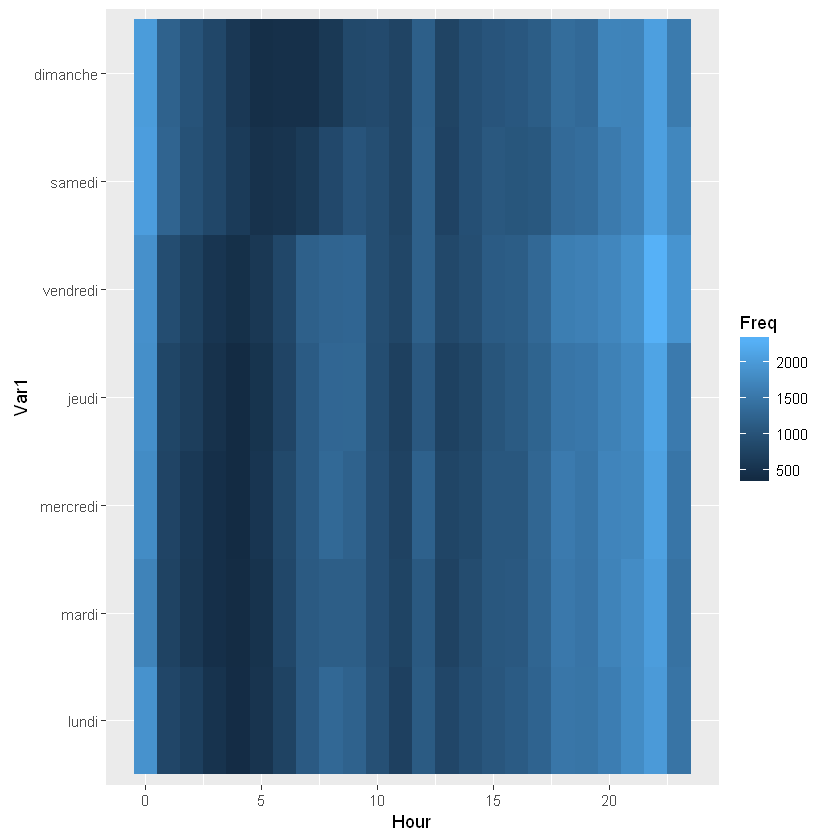

In [35]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
geom_tile(aes(fill=Freq))

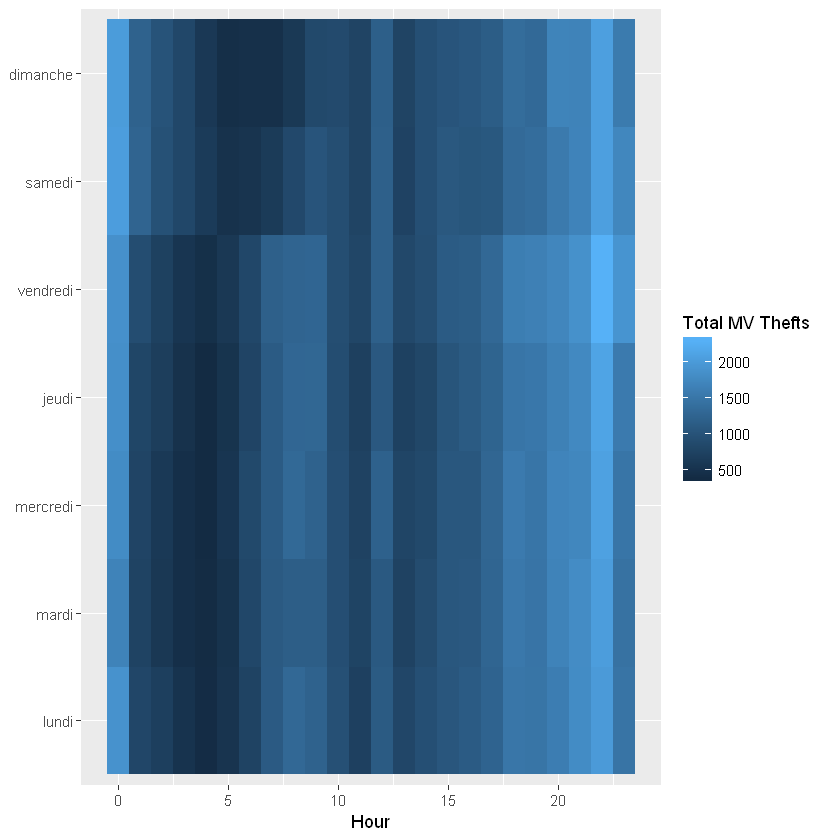

In [36]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
geom_tile(aes(fill=Freq)) +
scale_fill_gradient(name="Total MV Thefts") +
theme(axis.title.y=element_blank())

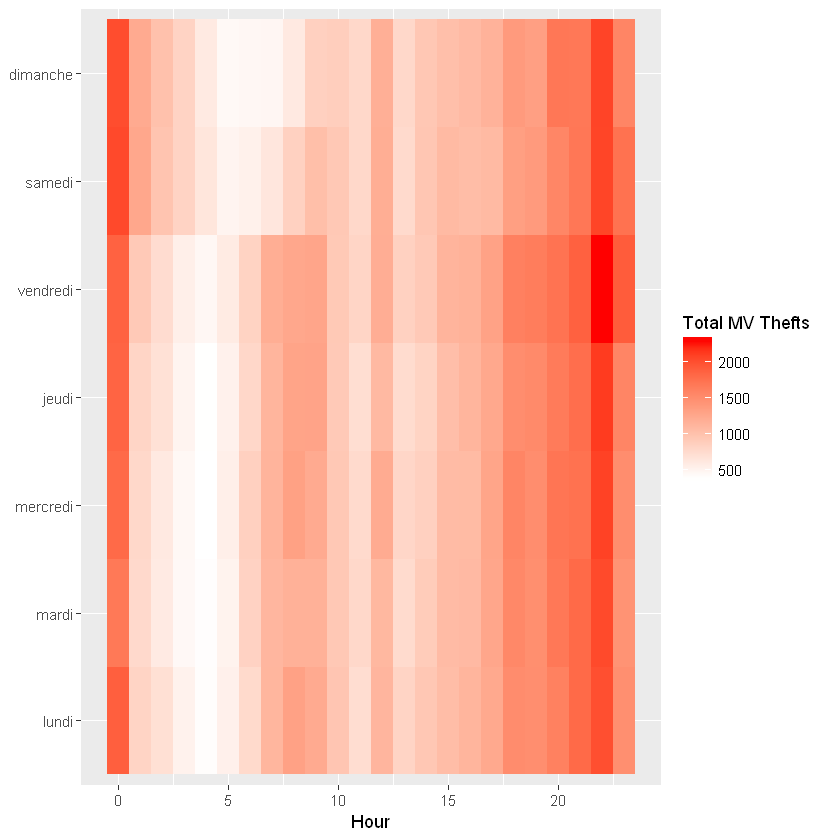

In [37]:
ggplot(DayHourCounts, aes(x=Hour, y=Var1)) +
geom_tile(aes(fill=Freq)) +
scale_fill_gradient(name="Total MV Thefts", low="white", high="red") +
theme(axis.title.y=element_blank())

In [38]:
library(maps)
library(ggmap)

In [39]:
chicago <- get_map(location = "chicago", zoom=11)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false


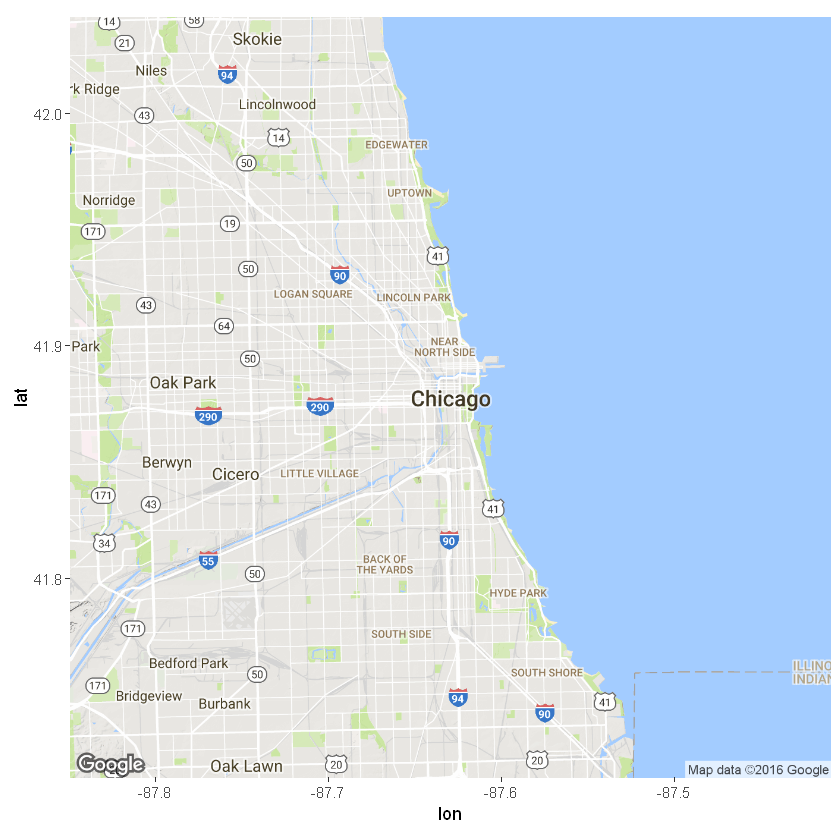

In [40]:
ggmap(chicago)

Warning message:
"Removed 7 rows containing missing values (geom_point)."

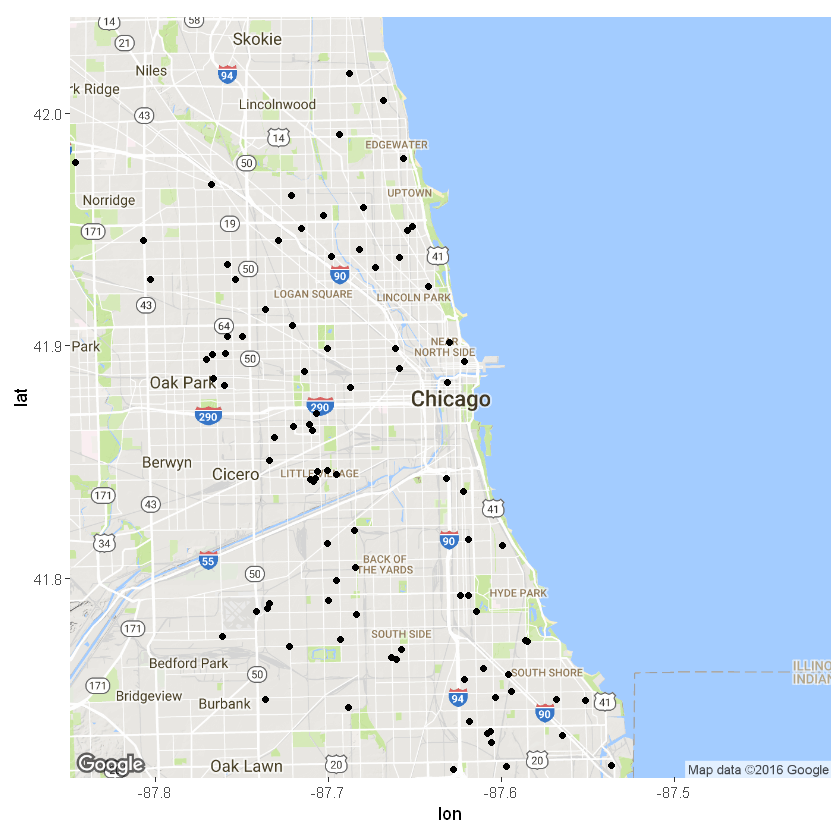

In [41]:
ggmap(chicago) + geom_point(data=mvt[1:100,], aes(x=Longitude, y=Latitude))

In [43]:
LatLongCounts <- as.data.frame(
    table(
        round(mvt$Longitude, 2), round(mvt$Latitude, 2)
    )
)

In [44]:
str(LatLongCounts)

'data.frame':	1638 obs. of  3 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  0 0 0 0 0 0 0 0 0 0 ...


In [45]:
LatLongCounts$Long <- as.numeric(as.character(LatLongCounts$Var1))
LatLongCounts$Lat <- as.numeric(as.character(LatLongCounts$Var2))

In [46]:
str(LatLongCounts)

'data.frame':	1638 obs. of  5 variables:
 $ Var1: Factor w/ 42 levels "-87.93","-87.92",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 39 levels "41.64","41.65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Long: num  -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ Lat : num  41.6 41.6 41.6 41.6 41.6 ...


Warning message:
"Removed 615 rows containing missing values (geom_point)."

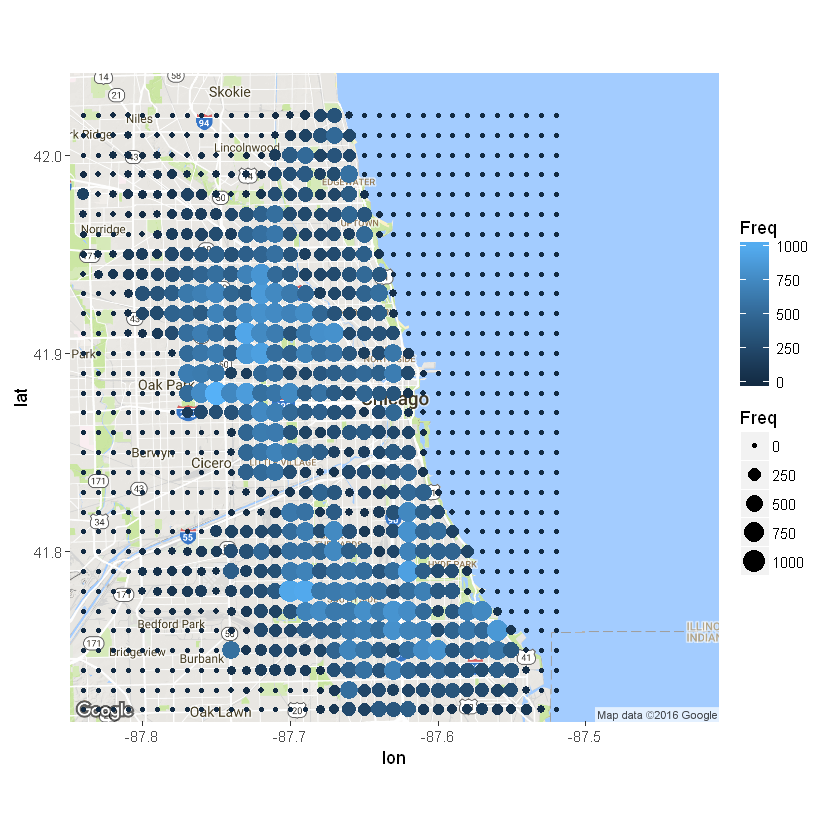

In [47]:
ggmap(chicago) +
geom_point(data=LatLongCounts, aes(x=Long, y=Lat, color=Freq, size=Freq))

Warning message:
"Removed 615 rows containing missing values (geom_point)."

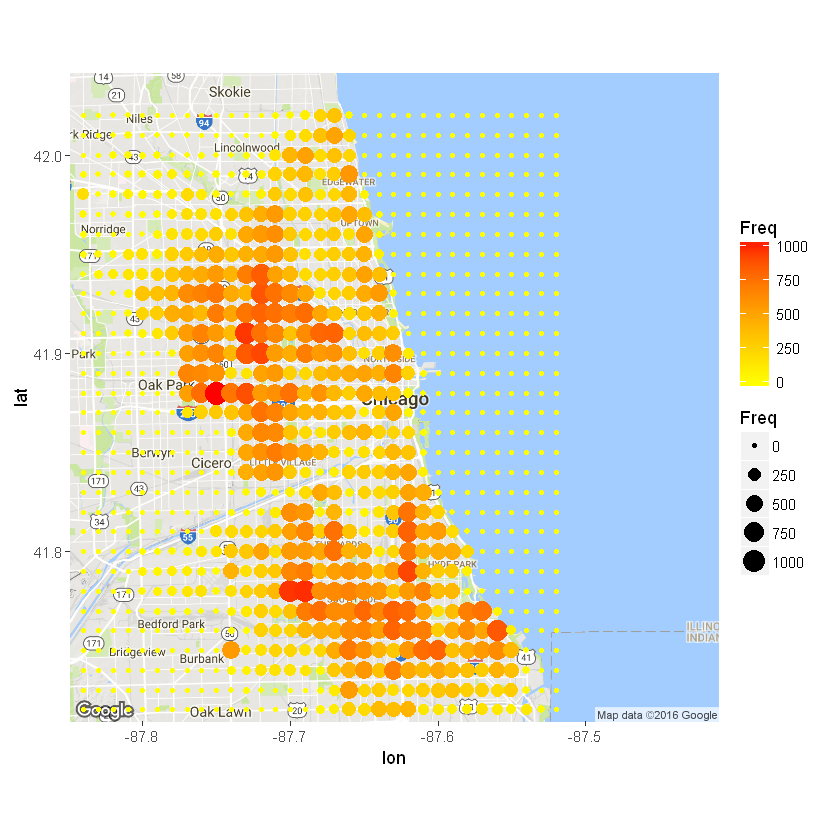

In [48]:
ggmap(chicago) +
geom_point(data=LatLongCounts, aes(x=Long, y=Lat, color=Freq, size=Freq)) +
scale_color_gradient(low="yellow", high="red")

Warning message:
"Removed 615 rows containing missing values (geom_tile)."

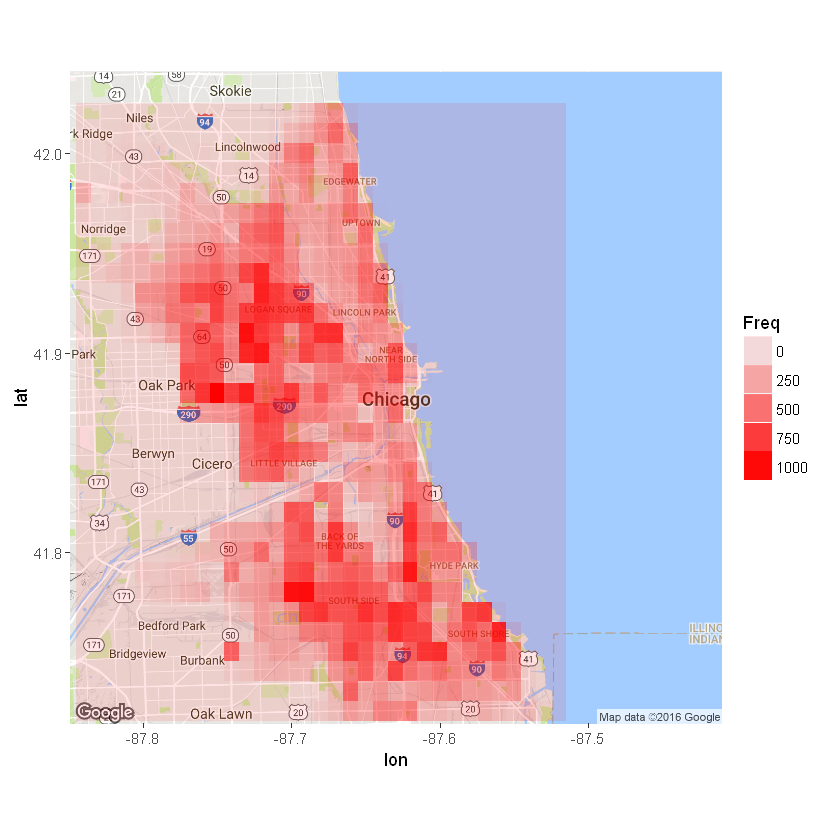

In [50]:
ggmap(chicago) +
geom_tile(data=LatLongCounts, aes(x=Long, y=Lat, alpha=Freq), fill="red")

Warning message:
"Removed 119 rows containing missing values (geom_tile)."

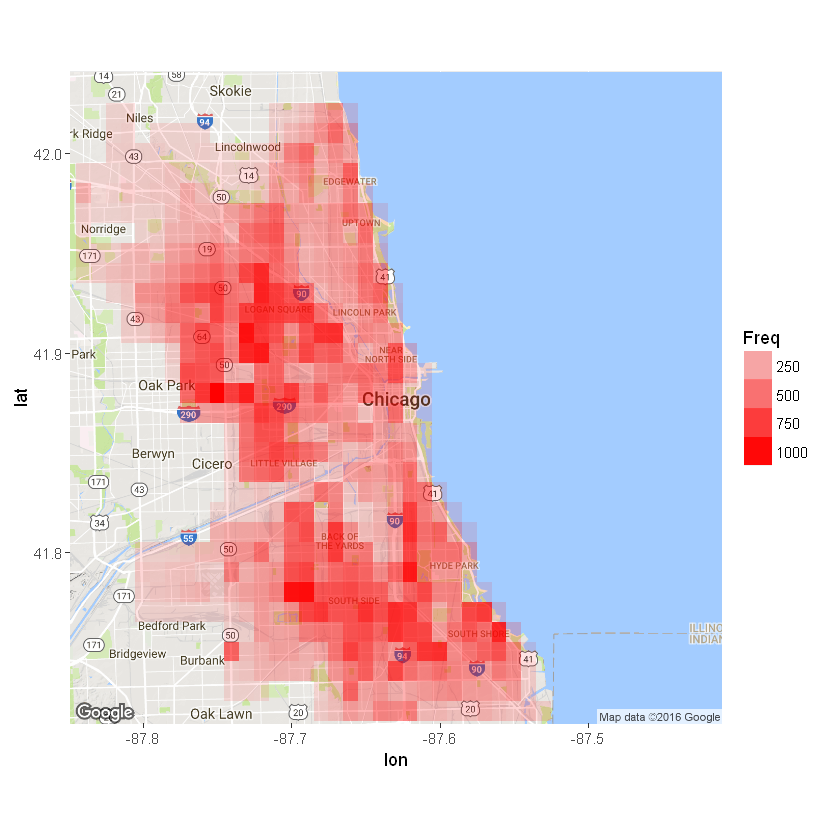

In [51]:
LatLongCounts2 <- subset(LatLongCounts, Freq > 0)
ggmap(chicago) +
geom_tile(data=LatLongCounts2, aes(x=Long, y=Lat, alpha=Freq), fill="red")

In [52]:
nrow(LatLongCounts) - nrow(LatLongCounts2)

[1] 952